In [124]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

%matplotlib inline

In [59]:
# read excel spreadsheet, pass to variable, peek at dataframe
df = pd.read_excel('impounds12-17.xlsx')

In [60]:
df.head()

Unnamed: 0     Unnamed: 1  \
0         NaN            NaN   
1         NaN  Docket Number   
2         NaN     06VP009432   
3         NaN     08VP002119   
4         NaN     09VP011647   

                                          Unnamed: 2             Unnamed: 3  \
0                                                NaN                    NaN   
1                     MCV Description w/ Disposition      Violation Address   
2  9-76-145    Sound device restrictions--Violati...  2150 N CALIFORNIA AVE   
3       7-24-225    Unlawful drugs in motor vehicle.     1160 N LARRABEE ST   
4                       9-80-220    Altered Temp Tag       4805 W DEMING PL   

            Unnamed: 4             Unnamed: 5  
0                  NaN                    NaN  
1       Violation Date  Imposed Fine Detailed  
2  2016-05-17 00:00:00                    500  
3  2013-04-18 00:00:00                      0  
4  2012-11-04 00:00:00                      0

In [61]:
# clean up blank columns and rows
df = df.drop(['Unnamed: 0'], axis=1)

In [62]:
df = df.drop([0])

In [63]:
columns = ['Docket Number', 'Violation Description', 
           'Violation Address', 'Violation Date', 'Imposed Fine Detailed' ]

In [64]:
df.columns = columns

In [65]:
df = df.drop(1)

In [66]:
df.head()

Docket Number                              Violation Description  \
2    06VP009432  9-76-145    Sound device restrictions--Violati...   
3    08VP002119       7-24-225    Unlawful drugs in motor vehicle.   
4    09VP011647                       9-80-220    Altered Temp Tag   
5    12VP000155  9-80-240  Vehicle operated by persons with sus...   
6    12VP000155                            9-92-030(h) - Insurance   

       Violation Address       Violation Date Imposed Fine Detailed  
2  2150 N CALIFORNIA AVE  2016-05-17 00:00:00                   500  
3     1160 N LARRABEE ST  2013-04-18 00:00:00                     0  
4       4805 W DEMING PL  2012-11-04 00:00:00                     0  
5       602 S KEDZIE AVE  2012-01-01 00:00:00                   500  
6       602 S KEDZIE AVE  2012-01-01 00:00:00                     0

In [67]:
# sum of fines imposed
df['Imposed Fine Detailed'].sum()

114494000

In [68]:
# total number of charges
len(df)

145503

In [69]:
# find total number of unique cases
len(df['Docket Number'].unique())

108134

In [70]:
# group by violation and find sum fines
fine_totals = df.groupby(['Violation Description']
          )['Imposed Fine Detailed'].sum().reset_index().sort_values('Imposed Fine Detailed', ascending=False)
fine_totals

Violation Description  Imposed Fine Detailed
53  9-80-240  Vehicle operated by persons with sus...               47108500
20       7-24-225    Unlawful drugs in motor vehicle.               30201000
21                                    7-24-226    DUI               15625000
8   2-14-132(10)  Removal/Relocation of Vehicle Su...                6562000
19  7-24-225    Unlawful drugs in motor vehicle wi...                6094000
22           7-24-226    DUI within 500ft park/school                3150000
51                       9-80-220    Altered Temp Tag                1616000
27   8-20-070  Unlawful firearm - Vehicle Impoundment                1289000
9   2-14-132(j)     Removal/Relocation of Vehicle ...                1069000
33               8-8-060    Street solicitation - VIP                 658000
46  9-76-145    Sound device restrictions--Violati...                 378000
28  8-20-070  Unlawful firearm within 500ft park/s...                 297000
64  9-92-035    Authority to impound fleeing vehicle.                 185000
34  8-8-060    Street solicitation within 500ft pa...                  93000
35                    8-8-060    Street solicitation.                  80000
4   10-8-480(c) Littering on public way from a veh...                  20650
25  7-28-440 Vehicle Impoundment - motor vehicle u...                   9000
17     3-56-155 Counterfeit wheel tax license emblems                   8000
32  8-4-130(c)    Possession of etching materials,...                   7000
48  9-76-145(c)(1)   Broadcast or Recorded Sound R...                   6500
41                          9-12-090      Drag Racing                   6000
31  8-4-130    Possession of etching materials, pa...                   5000
6   15-20-270    Unlawful fireworks in motor vehic...                   5000
52  9-80-225 Display of false, stolen or altered d...                   4500
12  2-14-135   Forfeitures, Investigations, Hit an...                   4000
37  9-112-555    Impoundment of vehicle--Notificat...                   3000
42  9-32-040 (a) Reckless Driving at, or interferi...                   2500
38  9-112-640  Impoundment of unlicensed Public Pa...                   2000
7   2-14-132 (10)subpar  Unlawful Removal of Vehic...                   2000
45  9-76-145    Sound device restrictions - Non-Ve...                   1250
..                                                ...                    ...
59            9-92-030(e) Metered Space Over 24 Hours                      0
60                            9-92-030(h) - Insurance                      0
61                               9-92-030(h) - Stolen                      0
62                               9-92-030(i) Arrestee                      0
50  9-80-120    Unauthorized parking in public or ...                      0
49  9-80-030(d)     No person shall cast, throw or...                      0
65  9-92-080    Release procedure for impounded ve...                      0
47  9-76-145(a)   Broadcast or Recorded Sound Rest...                      0
56  9-92-030(b) Unattended - Hazard or Obstruction...                      0
0   0000 - Non-matching violation received from ex...                      0
44                9-64-150 Public Safety Restrictions                      0
43  9-56-030    Duty upon striking fixtures or oth...                      0
2                  10-8-040    Temporary quiet zones.                      0
3    10-8-480    Littering on public way or property.                      0
5              15-20-150    Supervision of magazines.                      0
11                              2-14-135   Forfeiture                      0
13                             2-14-135   Hit and Run                      0
14                           2-14-135   Investigation                      0
15  2-14-135  Forfeitures, Investigations, Hit and...                      0
16   3-46-076      Unregistered Ground Transportation                      0
18          7-24-099(a)     

In [71]:
df['Violation Date'] = df['Violation Date'].astype(str)

In [78]:
# filter by year
twelve = df[df['Violation Date'] <= '2012-12-31']
thirteen = df[(df['Violation Date'] >= '2013-01-01') & (df['Violation Date'] <= '2013-12-31')]
fourteen = df[(df['Violation Date'] >= '2014-01-01') & (df['Violation Date'] <= '2014-12-31')]
fifteen = df[(df['Violation Date'] >= '2015-01-01') & (df['Violation Date'] <= '2015-12-31')]
sixteen = df[(df['Violation Date'] >= '2016-01-01') & (df['Violation Date'] <= '2016-12-31')]
seventeen = df[df['Violation Date'] >= '2017-01-01']

In [79]:
years = [twelve, thirteen, fourteen, fifteen, sixteen, seventeen]

In [102]:
# sum of fines imposed by year
var = 2012
for year in years:
    print("Total fines in", str(var), "-", year['Imposed Fine Detailed'].sum())
    var += 1

Total fines in 2012 - 23173350
Total fines in 2013 - 20186750
Total fines in 2014 - 19516400
Total fines in 2015 - 17955800
Total fines in 2016 - 16641200
Total fines in 2017 - 16840500


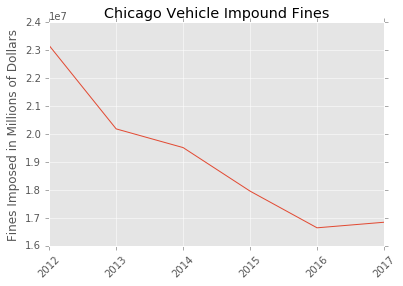

In [129]:
# let's make a line plot
x = np.arange(6)
year_totals = [23173350, 20186750, 19516400, 17955800, 16641200, 16840500]
labels = ['2012', '2013', '2014', '2015', '2016', '2017']

plt.title('Chicago Vehicle Impound Fines')
plt.plot(x, year_totals)
plt.ylabel('Fines Imposed in Millions of Dollars')
plt.xticks(x, labels, rotation=45)
plt.show()